Linear Convolution (Direct): [0.0, 1.0, 2.5, 5.0, 7.5, 5.0, 4.0]
Linear Convolution (numpy.convolve): [0.0, 1.0, 2.5, 5.0, 7.5, 5.0, 4.0]
Circular Convolution (Direct): [7.5, 6.0, 6.5, 5.0]
Circular Convolution (DFT): [7.5, 6.0, 6.5, 5.0]




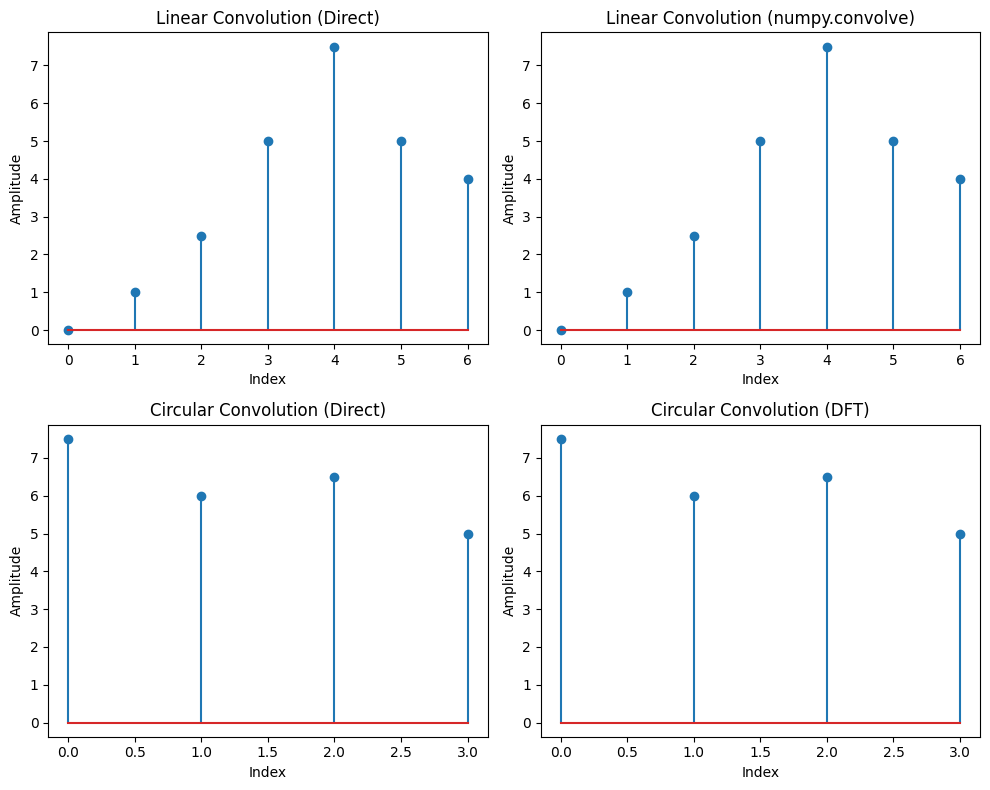

In [3]:
# 1.1
# 1. Linear and Circular Convolution of Two Signals
# Objective: Implement linear and circular convolution.

# Task:
# • Define two discrete-time sequences:
#  x[n] = [1, 2, 3, 4], h[n] = [0, 1, 0.5, 1]
# • Compute linear convolution using:
# – Direct formula implementation.
# – numpy.convolve().
# • Compute circular convolution using:
# – Direct formula implementation.
# – The Discrete Fourier Transform (DFT) method via numpy.fft.fft().
# • Compare the results.

import numpy as np
import matplotlib.pyplot as plt

signal = np.array([1, 2, 3, 4])
impulse_response = np.array([0, 1, 0.5, 1]) 

# Linear Convolution using direct formula implementation
def linear_conv(signal, imp_resp):
    len_sig = len(signal)
    len_imp_resp = len(imp_resp)
    result = np.zeros(len_sig + len_imp_resp - 1)
    for n in range(len_sig + len_imp_resp - 1):
        for k in range(len_sig):
            if 0 <= n - k < len_imp_resp:
                result[n] += signal[k] * imp_resp[n - k]
    return result

linear_conv_direct = linear_conv(signal, impulse_response)

# Linear Convolution using numpy.convolve()
linear_conv_numpy = np.convolve(signal, impulse_response)

# Circular Convolution using direct formula implementation
def circular_conv(signal, imp_resp):
    len_sig = len(signal)
    result = np.zeros(len_sig)
    for n in range(len_sig):
        for k in range(len_sig):
            result[n] += signal[k] * imp_resp[(n - k) % len_sig]
    return result

circular_conv_direct = circular_conv(signal, impulse_response)

# Circular Convolution using DFT method via numpy.fft.fft()
def circular_conv_dft(signal, imp_resp):
    len_sig = len(signal)
    signal_fft = np.fft.fft(signal, len_sig)
    imp_resp_fft = np.fft.fft(imp_resp, len_sig)
    result_fft = signal_fft * imp_resp_fft
    result = np.fft.ifft(result_fft)
    return np.real(result)

circular_conv_dft_result = circular_conv_dft(signal, impulse_response)

def format_result(result):
    return [float(f"{val:.1f}") for val in result]

#  Results
print("Linear Convolution (Direct):", format_result(linear_conv_direct))
print("Linear Convolution (numpy.convolve):", format_result(linear_conv_numpy))
print("Circular Convolution (Direct):", format_result(circular_conv_direct))
print("Circular Convolution (DFT):", format_result(circular_conv_dft_result))
print('\n')

# Plotting the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.stem(format_result(linear_conv_direct))
plt.title('Linear Convolution (Direct)')
plt.xlabel('Index')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.stem(format_result(linear_conv_numpy))
plt.title('Linear Convolution (numpy.convolve)')
plt.xlabel('Index')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.stem(format_result(circular_conv_direct))
plt.title('Circular Convolution (Direct)')
plt.xlabel('Index')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.stem(format_result(circular_conv_dft_result))
plt.title('Circular Convolution (DFT)')
plt.xlabel('Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()